# IMPORTING OPERATIN SYSTEM AND CHANGING WORKING DIRECTORY

In [1]:
import os 
os.chdir("C:/Users/LENOVO/OneDrive/Documents/Data Science Projects/STUDENT PERFORMANCE ANALYSIS")

print("Working Directory Changed Successfully")

Working Directory Changed Successfully


# IMPORTING MY WORKING LIBRARIES

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
from scipy import stats
import seaborn as sns

print("Libraries imported Successfully")

Libraries imported Successfully


# READING THE FILE AND SCRAPPING IT

In [6]:
with open('Student_data_files/sheet001.htm', 'r', encoding='utf-8') as file:
    soup = BeautifulSoup(file, 'html.parser')

print("File Loaded Successfully!")

File Loaded Successfully!


# FINDING THE TABLE CONTAINER 
SAFETY CHECKS
# EXTRECTING THE HEADERS AND DISPLAYING THE RESULT

In [7]:
table = soup.find('table')
if table:
    print("Found The:")
    headers = [th.get_text(strip=True) for th in table.find_all('tr') [0].find_all('td')]
    print(headers)
else:
    print("File Opened, but I couldn't find the table. Check the HTML file.")

Found The:
['Student_ID', 'Gender', 'Age', 'Attendance_Rate', 'Study_Hours_Weekly', 'Parental_Support', 'Extracurricular_Activities', 'Internet_Access', 'Maths_Score', 'English_Score', 'Science_Score', 'Average_Score', 'Performance_Category']


# LOADING THE DATASETS AND PRINTING THE SHAPES OF ROWS AND COLUMNS 

In [8]:
df = pd.read_excel('Student_data.xlsx')

print(f"Original Data Shape: {df.shape}")

Original Data Shape: (200, 13)


In [9]:
df

,Student_ID,Gender,Age,Attendance_Rate,Study_Hours_Weekly,Parental_Support,Extracurricular_Activities,Internet_Access,Maths_Score,English_Score,Science_Score,Average_Score,Performance_Category
0,STU001,Female,22,97.62,25,Low,Yes,Yes,81,83,86,83.33,Excellent
1,STU002,Female,23,90.38,8,Medium,Yes,Yes,45,78,73,65.33,Average
2,STU003,Male,19,96.56,12,Medium,Yes,Yes,90,62,46,66.00,Average
3,STU004,Female,24,77.74,21,Low,Yes,Yes,93,77,61,77.00,Good
4,STU005,Female,16,81.12,19,High,Yes,Yes,55,56,93,68.00,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,STU196,Male,16,92.09,25,Medium,Yes,No,69,46,91,68.67,Average
196,STU197,Male,21,70.95,13,Low,Yes,No,94,98,89,93.67,Excellent
197,STU198,Male,23,82.29,5,High,Yes,No,62,51,89,67.33,Average
198,STU199,Male,20,85.36,25,High,No,Yes,56,83,100,79.67,Good


# CLEANING THE DATA EDA

HANDLING MISSING VALUE

In [ ]:
df.fillna({'Attendance_Rate': df['Attendance_Rate'].median(), 'Study_Hours_Weekly': df['Study_Hours_Weekly'].median()}, inplace=True)

GETTING THE DATA FRAME INFORMATIONS

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  200 non-null    object 
 1   Gender                      200 non-null    object 
 2   Age                         200 non-null    int64  
 3   Attendance_Rate             200 non-null    float64
 4   Study_Hours_Weekly          200 non-null    int64  
 5   Parental_Support            200 non-null    object 
 6   Extracurricular_Activities  200 non-null    object 
 7   Internet_Access             200 non-null    object 
 8   Maths_Score                 200 non-null    int64  
 9   English_Score               200 non-null    int64  
 10  Science_Score               200 non-null    int64  
 11  Average_Score               200 non-null    float64
 12  Performance_Category        200 non-null    object 
dtypes: float64(2), int64(5), object(6)


CHECKING  DUPLICATES

In [13]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

 GETTING THE STATISTICAL SUMMARY OF THE NUMERICAL COLUMNS

In [12]:
df.describe()

,Age,Attendance_Rate,Study_Hours_Weekly,Maths_Score,English_Score,Science_Score,Average_Score
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000
mean,20.320000,84.656900,14.965000,67.715000,69.90000,68.25500,68.623150
std,3.252768,8.515051,6.242485,19.556484,18.73781,18.22583,10.186479
min,15.000000,70.100000,5.000000,35.000000,40.00000,38.00000,46.000000
25%,17.000000,77.347500,10.000000,52.000000,53.75000,52.00000,61.247500
50%,21.000000,85.175000,15.000000,67.000000,70.00000,67.00000,69.000000
75%,23.000000,92.387500,21.000000,85.250000,87.25000,85.00000,76.082500
max,25.000000,97.900000,25.000000,100.000000,100.00000,100.00000,96.000000


# CREATING ADDITIONAL FEATURES

CALCULATING TOTAL SCORE

In [15]:
df['Total_Score'] = df['Maths_Score'] + df['English_Score'] + df['Science_Score']

CREATING HIGH ATTENDANCE

In [16]:
df['Has_High_Attendance'] = df['Study_Hours_Weekly'] >= 85

CREATING STUDIES ADEQUATELY

In [17]:
df['Studies_Adequately'] = df['Study_Hours_Weekly'] >= 15

DEFFINING FUNCTION TO GRADE THE SCORES

In [19]:
def get_subject_category(Score):
    if Score >= 80: 
        return 'Excellent'
    elif Score >= 70:
        return 'Good'
    elif Score >= 50: 
        return 'Average'
    else:
        return 'Poor'
    

APPLYING THE FUNCTION TO EACH SUBJECT

In [20]:
df['Maths_Category'] = df['Maths_Score'].apply(get_subject_category)
df['English_Category'] = df['English_Score'].apply(get_subject_category)
df['Science_Category'] = df['Science_Score'].apply(get_subject_category)

SAVING THE CLEANED DATA 

In [76]:
df.to_excel('Cleaned_Student_Data.xlsx', index=False)
print("\n Data Cleaning Completed!")
print(f"Final Data Shape: {df.shape}")
print("Saved new file: 'Cleaned_Student_data.xlsx'")

#cleaned_df = 'clean_student_data.xlsx'


 Data Cleaning Completed!
Final Data Shape: (200, 19)
Saved new file: 'Cleaned_Student_data.xlsx'


VERIFYING THE NEW COLUMNS

In [35]:
print(df[['Student_ID', 'Total_Score', 'Maths_Category', 'English_Category', 'Science_Category','Has_High_Attendance']])

    Student_ID  Total_Score Maths_Category English_Category Science_Category  \
0       STU001          250      Excellent        Excellent        Excellent   
1       STU002          196           Poor             Good             Good   
2       STU003          198      Excellent          Average             Poor   
3       STU004          231      Excellent             Good          Average   
4       STU005          204        Average          Average        Excellent   
..         ...          ...            ...              ...              ...   
195     STU196          206        Average             Poor        Excellent   
196     STU197          281      Excellent        Excellent        Excellent   
197     STU198          202        Average          Average        Excellent   
198     STU199          239        Average        Excellent        Excellent   
199     STU200          225      Excellent        Excellent             Poor   

     Has_High_Attendance  
0           

# COMPREHENSIVE ANALYSIS

LOADING THE CLEANED STUDENT DATA

In [77]:
df = pd.read_excel('Cleaned_Student_Data.xlsx')
df

,Student_ID,Gender,Age,Attendance_Rate,Study_Hours_Weekly,Parental_Support,Extracurricular_Activities,Internet_Access,Maths_Score,English_Score,Science_Score,Average_Score,Performance_Category,Total_Score,Has_High_Attendance,Studies_Adequately,Maths_Category,English_Category,Science_Category
0,STU001,Female,22,97.62,25,Low,Yes,Yes,81,83,86,83.33,Excellent,250,False,True,Excellent,Excellent,Excellent
1,STU002,Female,23,90.38,8,Medium,Yes,Yes,45,78,73,65.33,Average,196,False,False,Poor,Good,Good
2,STU003,Male,19,96.56,12,Medium,Yes,Yes,90,62,46,66.00,Average,198,False,False,Excellent,Average,Poor
3,STU004,Female,24,77.74,21,Low,Yes,Yes,93,77,61,77.00,Good,231,False,True,Excellent,Good,Average
4,STU005,Female,16,81.12,19,High,Yes,Yes,55,56,93,68.00,Average,204,False,True,Average,Average,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,STU196,Male,16,92.09,25,Medium,Yes,No,69,46,91,68.67,Average,206,False,True,Average,Poor,Excellent
196,STU197,Male,21,70.95,13,Low,Yes,No,94,98,89,93.67,Excellent,281,False,False,Excellent,Excellent,Excellent
197,STU198,Male,23,82.29,5,High,Yes,No,62,51,89,67.33,Average,202,False,False,Average,Average,Excellent
198,STU199,Male,20,85.36,25,High,No,Yes,56,83,100,79.67,Good,239,False,True,Average,Excellent,Excellent


1.CALCULATING BASIC STATISTICS AVERAGE

In [58]:
print("=== 1. BASIC STATISTICS ===")
print(f"Total Students: {len(df)}")
print(f"Average Maths Score: {df['Maths_Score'].mean(): .2f}")
print(f"Average English Score: {df['English_Score'].mean(): .2f}")
print(f"Average Science Score: {df['Science_Score'].mean(): .2f}")
print(f"Overall Average: {df['Average_Score'].mean(): .2f}")

print("\nPerformance Distribution:")
print(df['Performance_Category'].value_counts())

=== 1. BASIC STATISTICS ===
Total Students: 200
Average Maths Score:  67.72
Average English Score:  69.90
Average Science Score:  68.25
Overall Average:  68.62

Performance Distribution:
Performance_Category
Average              100
Good                  69
Excellent             25
Needs Improvement      6
Name: count, dtype: int64


2.CORRELATION ANALYSIS

In [50]:
print("\n=== 2. CORRELATION ANALYSIS ===")
Numerical_Cols = ['Attendance_Rate', 'Study_Hours_Weekly', 'Age','Maths_Score','English_Score','Science_Score','Average_Score']

# CALCULATING CORRELATION MATRIX
correlation_matrix = df[Numerical_Cols].corr()

# SHOWING WHAT AFFECTS THE AVERAGE SCORE THE MOST
print(correlation_matrix['Average_Score'].sort_values(ascending=False))


=== 2. CORRELATION ANALYSIS ===
Average_Score         1.000000
Maths_Score           0.609313
English_Score         0.530076
Science_Score         0.477966
Study_Hours_Weekly    0.144944
Age                   0.115328
Attendance_Rate       0.005375
Name: Average_Score, dtype: float64


3.CALCULATING PERFORMANCE BY FACTORS

In [51]:
print("\n=== 3. PERFORMANCE BY FACTORS ===") 
# ANALYZING GENDER
print("\n Average Score by Gender:")
print(df.groupby('Gender')['Average_Score'].mean())

# ANALYZING PARENTAL SUPPORT
print("\n Average Score by Parental Support:")
print(df.groupby('Parental_Support')['Average_Score'].mean())


=== 3. PERFORMANCE BY FACTORS ===

 Average Score by Gender:
Gender
Female    68.47602
Male      68.76451
Name: Average_Score, dtype: float64

 Average Score by Parental Support:
Parental_Support
High      68.076143
Low       69.564308
Medium    68.271077
Name: Average_Score, dtype: float64


4.STATISTICAL TEST

In [54]:
print("\n=== 4. STATISTICAL TESTS ===")
# T-TEST: DOES GENDER MAKE A SIGNIFIICANT DIFFERENCE?
Male_Scores = df[df['Gender'] == 'Male']['Average_Score']
Female_Scores = df[df['Gender'] == 'Female']['Average_Score']

t_stat, p_value = stats.ttest_ind(Male_Scores, Female_Scores)
print(f"T-test between Genders: \n t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

# INTERPRETATION
if p_value < 0.05:
    print("Result: Significant difference found between genders.")
else:
    print("Result: No significant differnce found between genders.")


=== 4. STATISTICAL TESTS ===
T-test between Genders: 
 t-statistic = 0.200, p-value = 0.842
Result: No significant differnce found between genders.


In [53]:
print("\n Analysis Completed")


 Analysis Completed


# VISUALIZATION

LOADING THE CLEANED DATA

In [59]:
df = pd.read_excel('Cleaned_Student_Data.xlsx')
print("Data loaded Successfully!")

Data loaded Successfully!


ETTING THE ARTISTIS STYLE

In [60]:
plt.style.use('ggplot')
sns.set_palette("husl")

VISUALIZATION  1: Performance Pie Chart

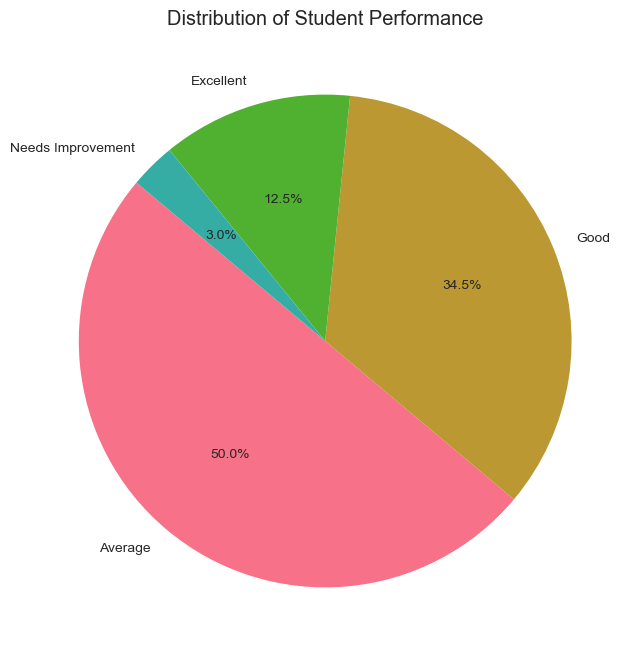

In [67]:
plt.figure(figsize=(8, 8))

# Counting How Many Students are in each category
counts = df['Performance_Category'].value_counts()

plt.pie(counts, labels=counts.index,autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Student Performance')
plt.savefig('1_Performance_Pie.png')
plt.show()

VISUALIZATION 2: STUDY HOURS VS. SCORE(SCATTER PLOT) 

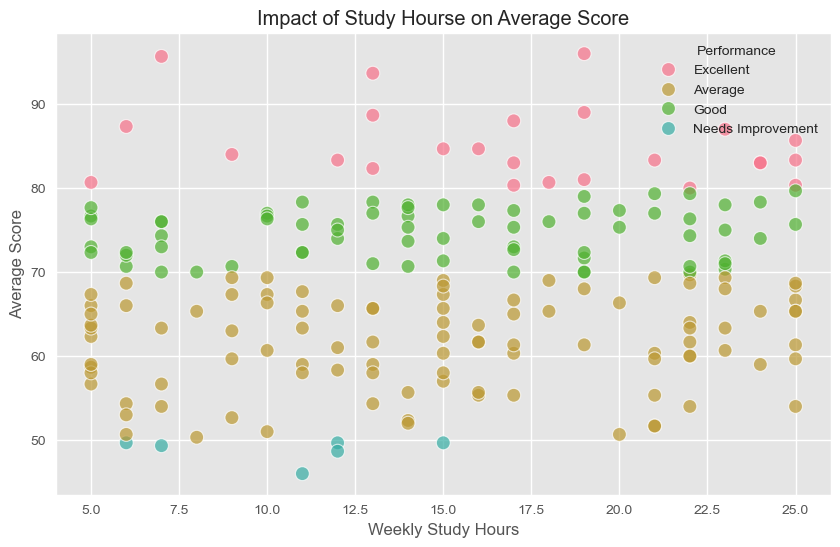

In [68]:
plt.figure(figsize=(10, 6))

# SCATTER PLOT SHOWING RELATIONSHIP BETTWEEN STUDYING AND GRADES
sns.scatterplot(data=df, x='Study_Hours_Weekly', y='Average_Score', hue='Performance_Category', s=100, alpha=0.7)

plt.title('Impact of Study Hourse on Average Score')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Average Score')
plt.legend(title='Performance')
plt.savefig('2_Study_Vs_Score.png')
plt.show()

 VISUALIZATIO 3: CORRELATION HEATMAP 

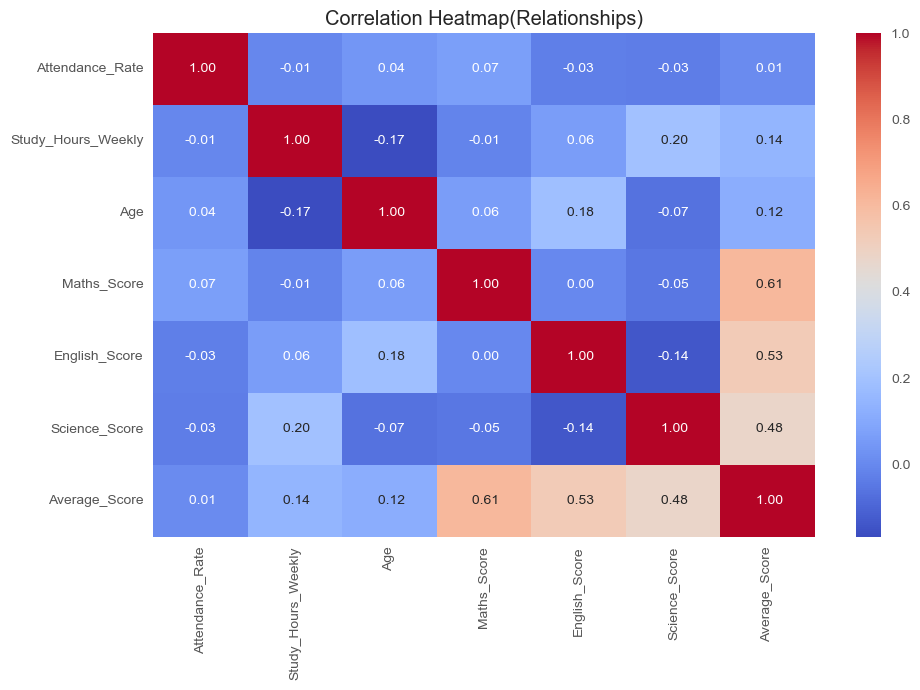

In [73]:
plt.figure(figsize=(10, 7))

# SELECT ONLY NUMBER COLUMNS FOR CORRELATION
Numerical_Cols = ['Attendance_Rate', 'Study_Hours_Weekly', 'Age', 'Maths_Score', 'English_Score', 'Science_Score', 'Average_Score']

# CREATE THE CORRELATION MATRIX
corr_matrix = df[Numerical_Cols].corr()
i
# DRAWING THE HEATMAP
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=' .2f')
plt.title('Correlation Heatmap(Relationships)')
plt.tight_layout()
plt.savefig('3_Correlation_Heat_Map.png')
plt.show()

VISUALIZATION 4: PARENTAL SUPPORT IMPACT (BAR CHART) 

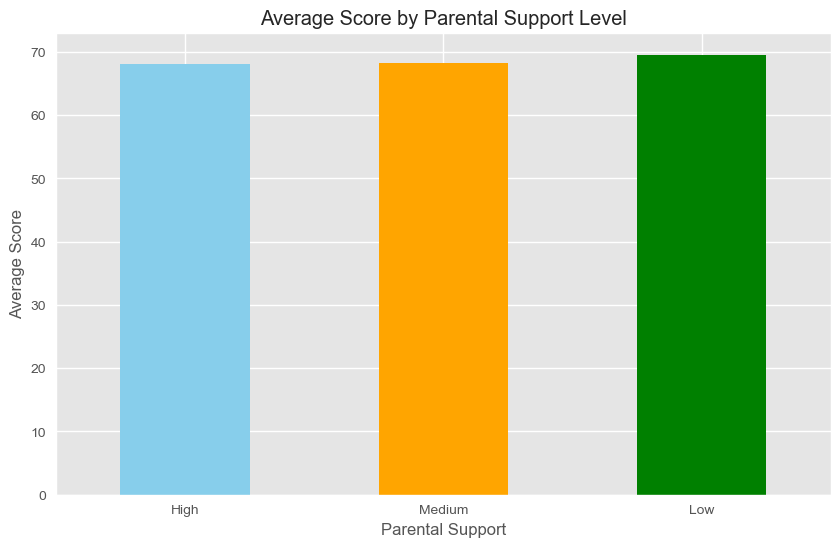

In [74]:
plt.figure(figsize=(10, 6))

# Group by Support Level and Get the Average Score
Support_impact = df.groupby('Parental_Support')['Average_Score'].mean().sort_values()

# Draw the Bar Chart
Support_impact.plot(kind='bar',color=['skyblue', 'orange', 'green'])
plt.title('Average Score by Parental Support Level')
plt.ylabel('Average Score')
plt.xlabel('Parental Support')
plt.xticks(rotation=0)
plt.savefig('4_Parental_Support.png')
plt.show()